# Binary Image Classification Using ConvNets

In this project, I built a binary image classification system to distinguish between **healthy salads and french fries** using computer vision. The goal was to understand how a Convolutional Neural Network can learn visual patterns from raw images and make accurate predictions on unseen data. This problem felt practical and relatable, especially given the growing use of image-based food recognition in health and nutrition applications.

I collected several hundred images of salads and fries from the web using the **Bing Image Downloader**. To make the dataset realistic, the images varied widely in lighting conditions, angles, backgrounds, and presentation styles. After downloading the data, I manually cleaned it by removing duplicates and irrelevant images such as pasta salads or onion rings to ensure clear class separation. I then organized the dataset into structured training, validation, and test directories, all stored locally within the Colab runtime so the entire notebook could be executed end-to-end without mounting external storage.

With the data prepared, I implemented a **vanilla Convolutional Neural Network (ConvNet)** from scratch and trained it using Keras image data generators. I evaluated the model’s performance on validation and test sets to assess generalization and check for overfitting. Beyond model accuracy, this project helped me understand the complete computer vision workflow, from data collection and preprocessing to model training and evaluation, and showed how deep learning can be applied to real-world image classification problems.

## Installing the Bing Image Downloader
Before running the download code, I installed the bing-image-downloader package, which makes it easy to query Bing and save the results locally.

In [ ]:
!pip install bing-image-downloader

## Creating a Directory for Image Storage

Before downloading the dataset, I am creating a new folder named images to store all the pictures that will be fetched from Bing.
The command !mkdir images uses the Linux make directory (mkdir) command within Colab’s environment (the ! allows running terminal commands directly).
This step helps organize the project by keeping all downloaded images in one place, making it easier to manage and preprocess them later.

In [ ]:
!mkdir images

## Checking the current IP address

Here, I am using the curl command to check the public IP address of my Colab environment. The website ipecho.net/plain simply returns the current IP address in plain text. This step helps verify the runtime environment and confirm internet connectivity before downloading data.

In [ ]:
# get your IP address
!curl ipecho.net/plain

35.231.148.92

## Downloading Salad and French Fries Images

In this step, images for the “Salad” category were downloaded directly from Bing using the bing-image-downloader library.
To increase variety and avoid duplicates, I used five different search phrases such as “green vegetable salad”, “fresh salad bowl”, and “healthy salad meal”.

Each query downloaded around 40 images, helping collect a balanced and diverse dataset of salads (~200 total images).
This approach also prevents long indexing delays by using smaller batches instead of one large query.
All downloaded folders are stored inside the images/raw_salad/ directory for further merging and preprocessing.

In [ ]:
# downloading salad images
!pip install -q bing-image-downloader
from bing_image_downloader import downloader
import os, shutil

# Create base folder
os.makedirs("images/raw_salad", exist_ok=True)

# Multiple queries with smaller limits
salad_queries = [
    "salad dish",
    "green vegetable salad",
    "fresh salad bowl",
    "mixed salad plate",
    "healthy salad meal"
]

for q in salad_queries:
    print(f"\n🔍 Downloading images for: {q}")
    downloader.download(q,
                        limit=40,  # lower limit = faster & avoids timeout
                        output_dir='images/raw_salad',
                        adult_filter_off=True,
                        force_replace=False,
                        timeout=30)

print("\n✅ All salad image subsets downloaded.")


Streaming output truncated to the last 5000 lines.



[!!]Indexing page: 36

[%] Indexed 34 Images on Page 36.




[!!]Indexing page: 37

[%] Indexed 34 Images on Page 37.




[!!]Indexing page: 38

[%] Indexed 35 Images on Page 38.


[%] Downloading Image #31 from https://www.gritsandpinecones.com/wp-content/uploads/2023/12/house-salad-final-plated-1024x1536.jpeg
[%] File Downloaded !

[%] Downloading Image #32 from http://images.media-allrecipes.com/images/70382.jpg
[%] File Downloaded !

[%] Downloading Image #33 from https://www.bhg.com/thmb/K_SGNzO89okGeTVQpZyL45HdjJ8=/1244x0/filters:no_upscale():strip_icc()/chickpea-freekah-salad-RU289794-1210baae22b34c83b76d7d17c70a3319.jpg
[%] File Downloaded !

[%] Downloading Image #34 from https://www.bhg.com/thmb/aJeaneA5GjseeO4gNUyXP1HStUY=/1244x0/filters:no_upscale():strip_icc()/RU260627-8121bd4af7ed44999b9642caaa52b24f.jpg
[%] File Downloaded !

[%] Downloading Image #35 from https://usercontent2.hubstatic.com/4346423_f120.jpg
[%] File D

#Merging All Salad Subfolders into One Folder
After downloading multiple subsets of salad images, this step combines all of them into a single folder named images/salad/.
Each image is automatically renamed with a unique filename (e.g., salad_1.jpg, salad_2.jpg, …) to prevent overwriting.

This process helps organize the dataset efficiently for training and ensures that every image is retained, even if duplicate names existed across subfolders.
Once all images are merged, the now-empty raw_salad directory is deleted to keep the workspace clean.

The final result is a single folder containing around 200 diverse salad images, ready for further preprocessing and model training.

In [ ]:
import os, shutil

# Create destination folder
dest = "images/salad"
os.makedirs(dest, exist_ok=True)

# List of salad-related folders
src_root = "images/raw_salad"
folders = [os.path.join(src_root, f) for f in os.listdir(src_root) if os.path.isdir(os.path.join(src_root, f))]

counter = 1

# Move & rename images safely
for folder in folders:
    for file_name in os.listdir(folder):
        src = os.path.join(folder, file_name)
        if os.path.isfile(src):
            ext = os.path.splitext(file_name)[1]
            new_name = f"salad_{counter}{ext}"
            dst = os.path.join(dest, new_name)
            shutil.move(src, dst)
            counter += 1
    shutil.rmtree(folder)
    print(f"Merged and deleted folder: {folder}")

# Delete 'raw_salad' folder if it exists
if os.path.exists("images/raw_salad"):
    shutil.rmtree("images/raw_salad")
    print("'images/raw_salad' folder deleted successfully.")
else:
    print("No 'raw_salad' folder found.")

print(f"✅ All salad images combined into '{dest}' with unique names.")
print(f"Total images: {len(os.listdir(dest))}")


Merged and deleted folder: images/raw_salad/salad dish
Merged and deleted folder: images/raw_salad/fresh salad bowl
Merged and deleted folder: images/raw_salad/mixed salad plate
Merged and deleted folder: images/raw_salad/healthy salad meal
Merged and deleted folder: images/raw_salad/green vegetable salad
'images/raw_salad' folder deleted successfully.
✅ All salad images combined into 'images/salad' with unique names.
Total images: 200


#Downloading French Fries Images

In this step, images for the junk food category (French Fries) were collected using the bing-image-downloader library.
To make the dataset diverse and realistic, multiple related search queries were used — including “french fries”, “crispy fries”, “curly fries”, “waffle fries”, and “loaded fries”.
Each search downloaded around 40 images, resulting in approximately 200 total images representing various styles and textures of fries.

All subcategories were stored inside the folder images/french fries/, which will later be merged into a single folder for model training.
Using several search terms ensures the model learns a broad visual understanding of different types of french fries, improving its classification accuracy.

In [ ]:
# Create main folder for junk food images
os.makedirs("images/french fries", exist_ok=True)

# List of fries-related search terms
fries_queries = [
    "french fries",
    "crispy fries",
    "curly fries",
    "waffle fries",
    "loaded fries"
]

# Download images for each query
for q in fries_queries:
    print(f"\n🔍 Downloading images for: {q}")
    downloader.download(q,
                        limit=40,                 # 40 per query ≈ 200 total
                        output_dir='images/french fries',
                        adult_filter_off=True,
                        force_replace=False,
                        timeout=30)

print("\n✅ All french fries image subsets downloaded inside 'images/french fries/'")


Streaming output truncated to the last 5000 lines.
[%] Indexed 12 Images on Page 1314.




[!!]Indexing page: 1315

[%] Indexed 12 Images on Page 1315.




[!!]Indexing page: 1316

[%] Indexed 12 Images on Page 1316.




[!!]Indexing page: 1317

[%] Indexed 12 Images on Page 1317.




[!!]Indexing page: 1318

[%] Indexed 12 Images on Page 1318.




[!!]Indexing page: 1319

[%] Indexed 12 Images on Page 1319.




[!!]Indexing page: 1320

[%] Indexed 12 Images on Page 1320.




[!!]Indexing page: 1321

[%] Indexed 12 Images on Page 1321.




[!!]Indexing page: 1322

[%] Indexed 12 Images on Page 1322.




[!!]Indexing page: 1323

[%] Indexed 12 Images on Page 1323.




[!!]Indexing page: 1324

[%] Indexed 12 Images on Page 1324.




[!!]Indexing page: 1325

[%] Indexed 12 Images on Page 1325.




[!!]Indexing page: 1326

[%] Indexed 12 Images on Page 1326.




[!!]Indexing page: 1327

[%] Indexed 12 Images on Page 1327.




[!!]Indexing page: 1328

[%] Indexed 12 Images on Page 1328.





#Merging All French Fries Subfolders into One Folder

After downloading multiple french fries subsets, this step combines all the subfolders (such as “crispy fries”, “curly fries”, “waffle fries”, and “loaded fries”) into a single organized folder named images/french_fries/.
Each image is automatically renamed (e.g., fries_1.jpg, fries_2.jpg, …) to prevent overwriting and ensure every image is retained.

Once all images are moved, the original images/french fries/ folder and its subfolders are deleted to keep the workspace clean.
This process results in a single folder containing around 200 diverse french fries images, which will be used later for model training and testing.

In [ ]:
import os, shutil

# Create final destination folder
dest = "images/french_fries"
os.makedirs(dest, exist_ok=True)

# List of fries-related folders to merge
src_root = "images/french fries"
folders = [os.path.join(src_root, f) for f in os.listdir(src_root) if os.path.isdir(os.path.join(src_root, f))]

counter = 1

# Move and rename files safely
for folder in folders:
    for file_name in os.listdir(folder):
        src = os.path.join(folder, file_name)
        if os.path.isfile(src):
            ext = os.path.splitext(file_name)[1]
            new_name = f"fries_{counter}{ext}"
            dst = os.path.join(dest, new_name)
            shutil.move(src, dst)
            counter += 1
    shutil.rmtree(folder)
    print(f"Merged and deleted folder: {folder}")

# Delete 'french fries' folder if it exists
if os.path.exists("images/french fries"):
    shutil.rmtree("images/french fries")
    print("'images/french fries' folder deleted successfully.")
else:
    print("No 'images/french fries' folder found.")

print(f"✅ All french fries images combined into '{dest}' with unique names.")
print(f"Total images: {len(os.listdir(dest))}")


Merged and deleted folder: images/french fries/waffle fries
Merged and deleted folder: images/french fries/loaded fries
Merged and deleted folder: images/french fries/french fries
Merged and deleted folder: images/french fries/curly fries
Merged and deleted folder: images/french fries/crispy fries
'images/french fries' folder deleted successfully.
✅ All french fries images combined into 'images/french_fries' with unique names.
Total images: 200


## Verifying Downloaded Folders

This command lists all the contents inside the images directory in detailed format.
It helps confirm that the folders for each class (salad and french fries) were successfully created and contain downloaded images.

In [ ]:
!ls images/ -alrt

total 32
drwxr-xr-x 1 root root  4096 Oct 10 00:07 ..
drwxr-xr-x 2 root root 12288 Oct 10 00:11 salad
drwxr-xr-x 2 root root 12288 Oct 10 00:19 french_fries
drwxr-xr-x 4 root root  4096 Oct 10 00:19 .


## Checking the Number of Downloaded Images

After downloading the dataset, it’s important to verify how many images were successfully saved for each class.
The command below uses a simple shell operation to count all the image files inside each folder:

find lists all files within a directory.

wc -l counts the number of lines returned, which equals the number of files.
This helps confirm that both classes (salad and french fries) have roughly the same number of images before proceeding with data preprocessing and model training.

In [ ]:
# Count how many images were successfully downloaded for each class

# Count all image files (-type f) inside the 'salad' folder
!find images/salad -type f | wc -l

# Count all image files (-type f) inside the 'french fries' folder
!find "images/french_fries" -type f | wc -l

200
200


## Checking Downloaded Image Files

Now that the images have been downloaded, I am listing the contents of each class folder to confirm that the files were saved correctly. This step helps verify that the dataset structure is correct before proceeding to the next stages of preprocessing and model building.

In [ ]:
!ls '/content/images/salad'

salad_100.jpg  salad_137.jpg   salad_173.jpg  salad_28.jpg   salad_64.jpg
salad_101.jpg  salad_138.jpg   salad_174.jpg  salad_29.jpg   salad_65.jpg
salad_102.jpg  salad_139.png   salad_175.jpg  salad_2.jpg    salad_66.jpg
salad_103.jpg  salad_13.jpg    salad_176.jpg  salad_30.jpg   salad_67.jpg
salad_104.jpg  salad_140.jpg   salad_177.jpg  salad_31.jpg   salad_68.jpg
salad_105.jpg  salad_141.jpg   salad_178.png  salad_32.jpg   salad_69.jpg
salad_106.jpg  salad_142.jpg   salad_179.png  salad_33.jpeg  salad_6.jpg
salad_107.jpg  salad_143.jpg   salad_17.jpg   salad_34.jpg   salad_70.jpg
salad_108.jpg  salad_144.jpg   salad_180.jpg  salad_35.jpeg  salad_71.png
salad_109.jpg  salad_145.jpg   salad_181.png  salad_36.jpg   salad_72.jpg
salad_10.jpg   salad_146.png   salad_182.jpg  salad_37.jpg   salad_73.jpg
salad_110.jpg  salad_147.jpg   salad_183.jpg  salad_38.jpg   salad_74.jpg
salad_111.jpg  salad_148.jpg   salad_184.jpg  salad_39.jpg   salad_75.jpg
salad_112.jpg  salad_149.jpg   salad_18

In [ ]:
!ls '/content/images/french_fries'

fries_100.png  fries_137.jpg   fries_173.jpg   fries_28.jpg   fries_64.jpg
fries_101.png  fries_138.jpg   fries_174.jpg   fries_29.jpg   fries_65.jpeg
fries_102.png  fries_139.jpg   fries_175.jpg   fries_2.jpg    fries_66.jpg
fries_103.png  fries_13.jpg    fries_176.jpg   fries_30.jpg   fries_67.jpg
fries_104.jpg  fries_140.jpg   fries_177.jpg   fries_31.jpg   fries_68.jpg
fries_105.png  fries_141.jpg   fries_178.jpg   fries_32.jpg   fries_69.jpg
fries_106.png  fries_142.png   fries_179.jpg   fries_33.jpg   fries_6.jpg
fries_107.jpg  fries_143.jpg   fries_17.jpg    fries_34.jpg   fries_70.jpg
fries_108.png  fries_144.jpg   fries_180.jpg   fries_35.jpeg  fries_71.jpg
fries_109.png  fries_145.jpg   fries_181.jpg   fries_36.jpg   fries_72.jpg
fries_10.jpg   fries_146.jpg   fries_182.jpg   fries_37.jpg   fries_73.jpg
fries_110.png  fries_147.jpg   fries_183.jpg   fries_38.jpg   fries_74.jpg
fries_111.png  fries_148.jpg   fries_184.jpg   fries_39.png   fries_75.jpg
fries_112.png  fries_149.

## Displaying a Sample Image

Now that the images have been downloaded, I am displaying one sample image from each class to visually confirm that the files were saved correctly and can be accessed without errors.

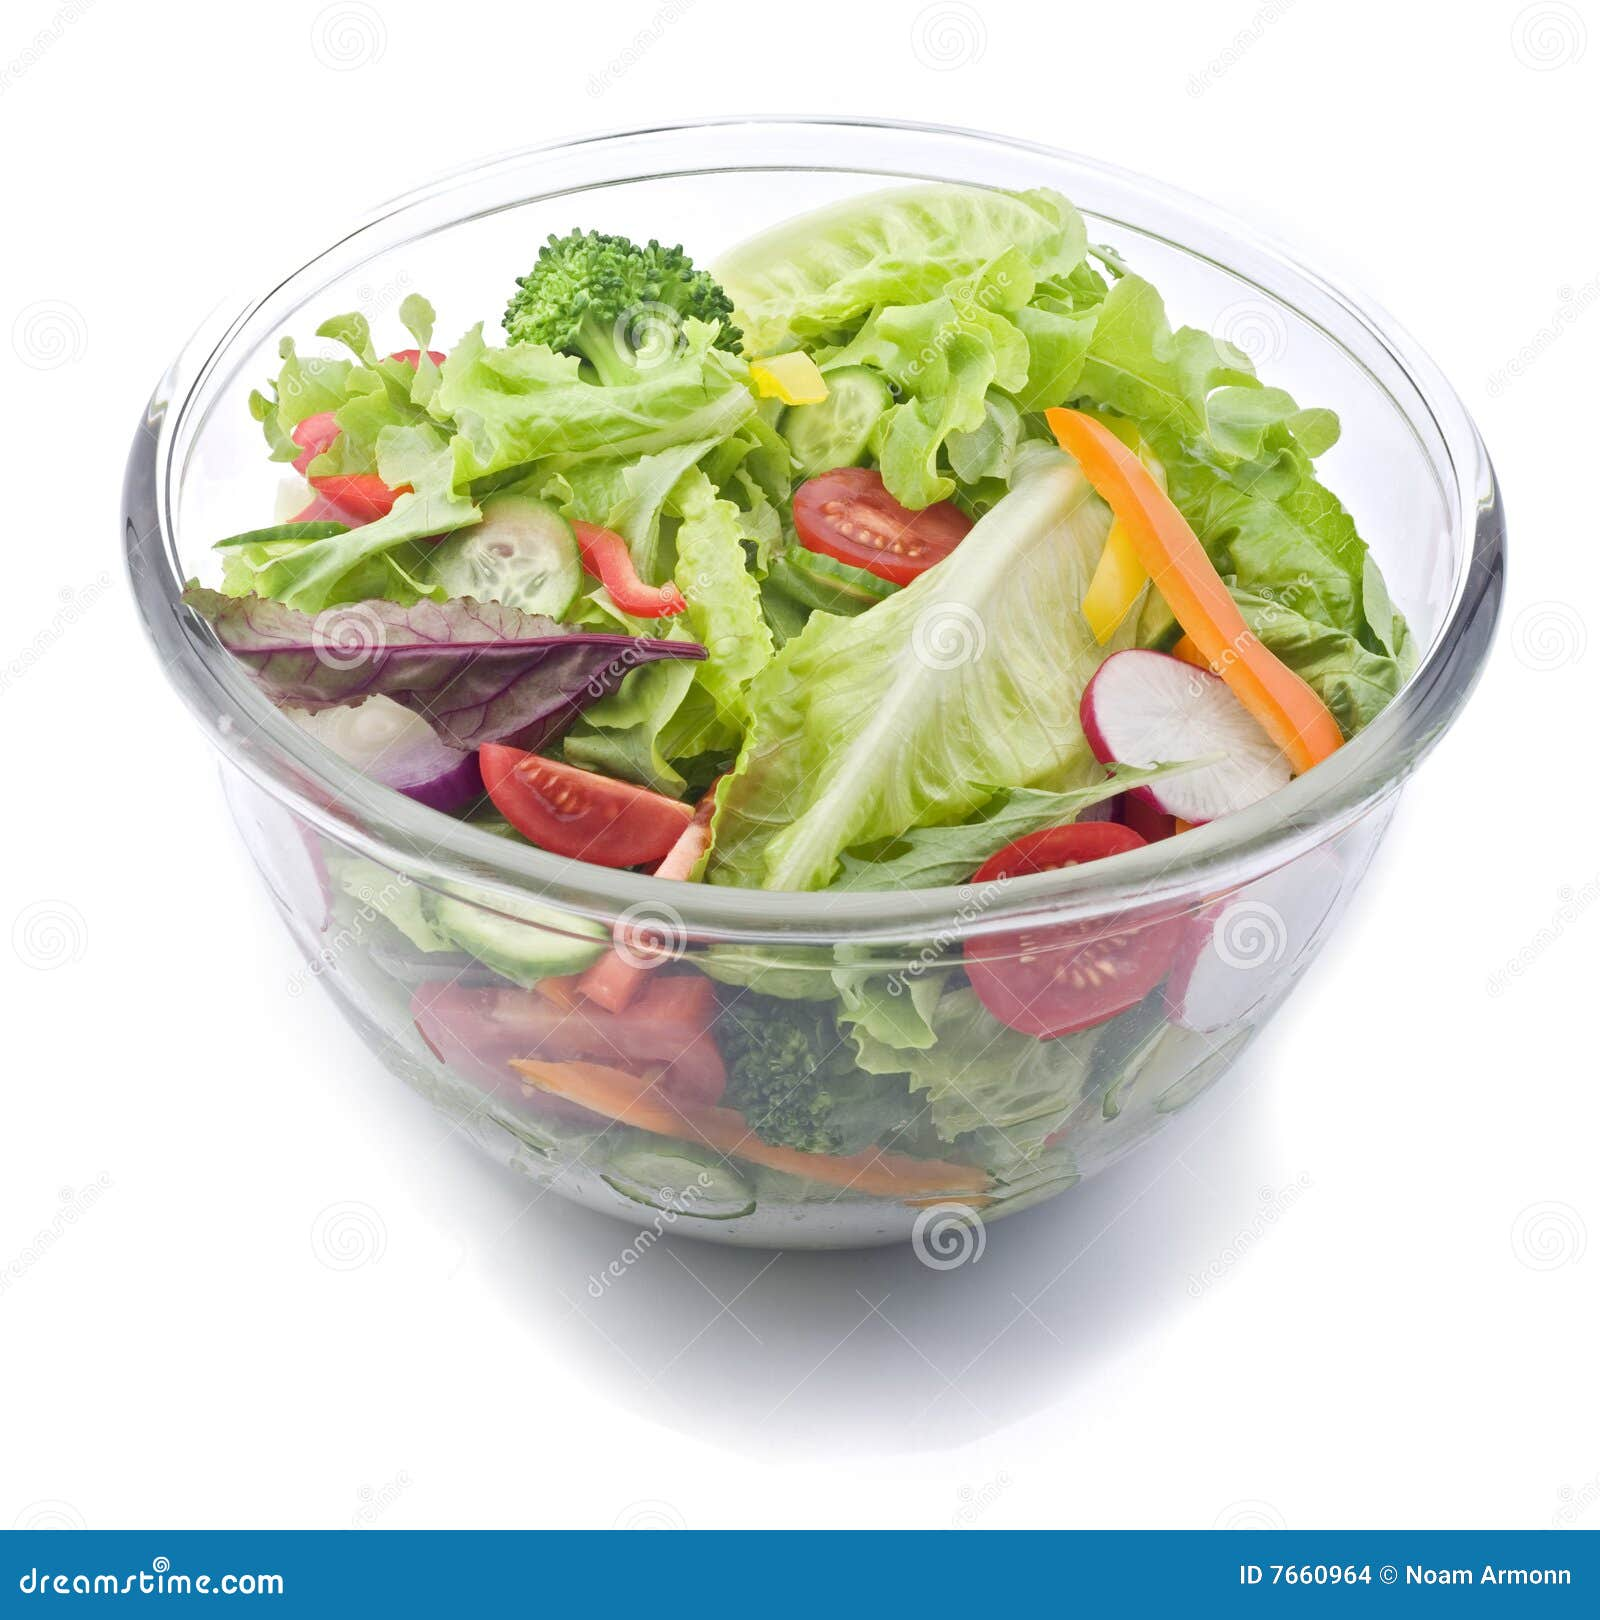

In [ ]:
# Import Image display function from IPython
from IPython.display import Image

# Display one sample image from the 'salad' class
Image("/content/images/salad/salad_44.jpg")

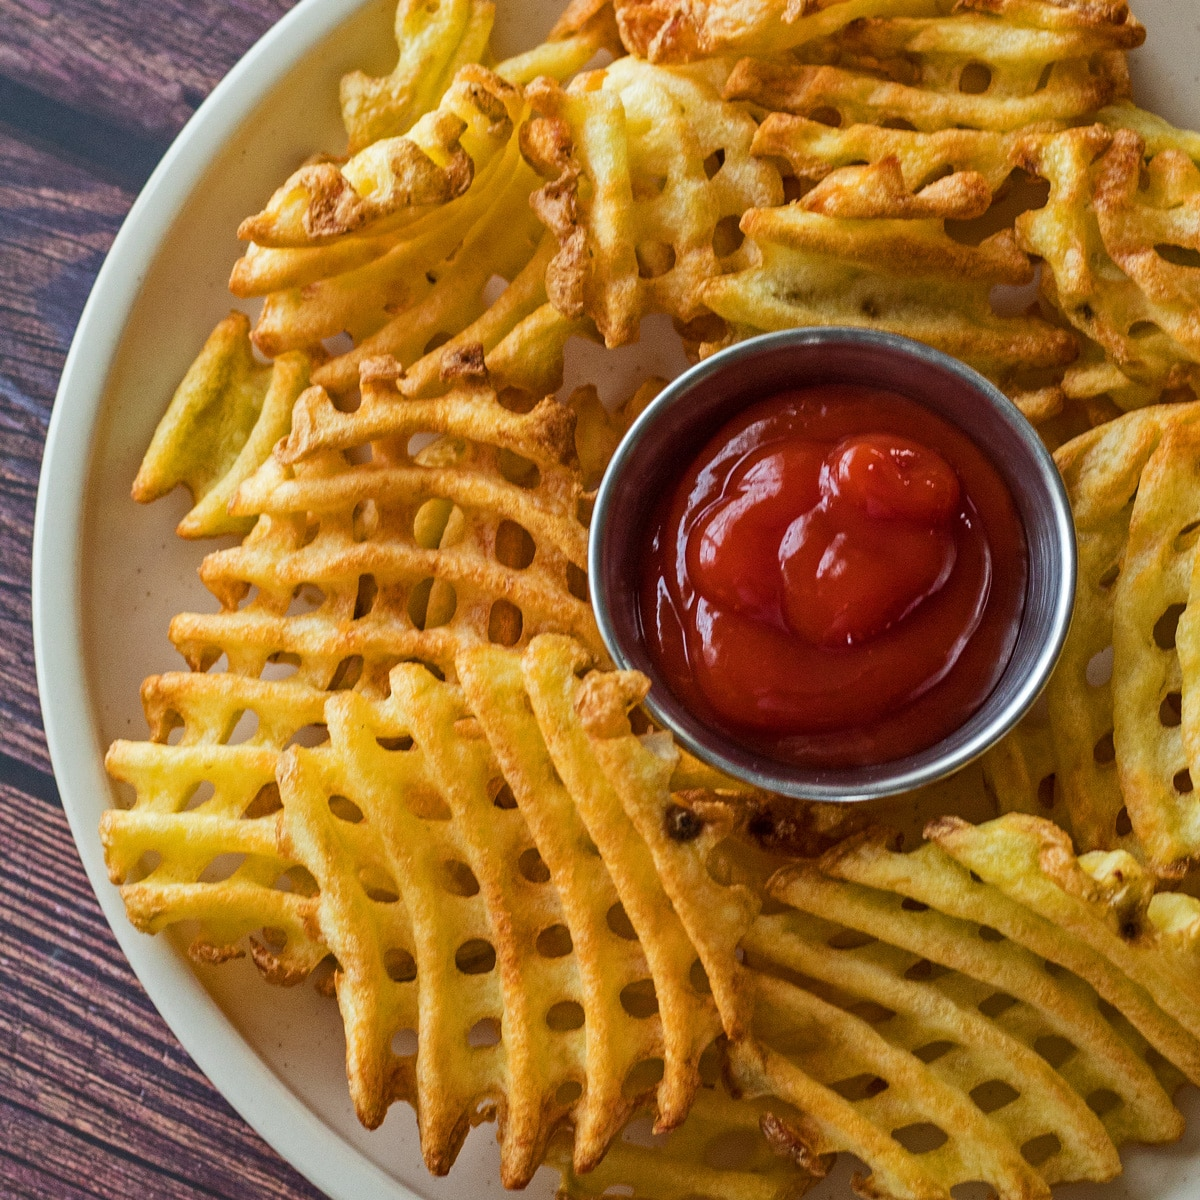

In [ ]:
# Display one sample image from the 'french fries' class
Image("/content/images/french_fries/fries_1.jpg")

## Importing Required Libraries for Image Processing

In this step, I am importing all the essential libraries needed to handle and visualize image data.

PIL (Pillow) is used to open and manipulate image files.

NumPy helps convert images into numerical arrays for model input.

glob and os are used for managing and locating image files within directories.

matplotlib is used to display images and visualize results such as training curves or sample outputs.
Together, these libraries provide the foundation for preprocessing and analyzing the dataset before training the convolutional neural network (CNN).

In [ ]:
from six import BytesIO
from PIL import Image
import numpy as np
import glob
import os

import matplotlib
import matplotlib.pyplot as plt

# Set random seeds for reproducibility

import random, tensorflow as tf
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

## Converting Images into NumPy Arrays

This function loads an image from a given file path and converts it into a NumPy array, which is the numerical format required for model processing.

The PIL library is used to open the image and ensure it is in RGB color mode (3 channels).

The image is then converted into a NumPy array of pixel values ranging from 0 to 255.
This step prepares the raw image data so it can be easily visualized, normalized, or fed into the convolutional neural network (CNN) during training.

In [ ]:
# def load_image_into_numpy_array(path):
#   img_data = open(path, 'rb').read()
#   image = Image.open(BytesIO(img_data))
#   (im_width, im_height) = image.size
#   return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

In [ ]:
from PIL import Image
import numpy as np
from io import BytesIO

def load_image_into_numpy_array(path):
    image = Image.open(path).convert("RGB")  # Ensures the image is in RGB mode
    return np.array(image, dtype=np.uint8)  # Directly convert to NumPy array


## Loading Images for Both Classes

In this step, I am loading all the downloaded images for both salad and french fries categories.
Using the glob library, the code loops through each folder and finds all image files (with extensions like .jpg, .png, etc.).
Each image is then converted into a NumPy array using the previously defined load_image_into_numpy_array() function.
All the loaded images are stored separately in two lists — salad_images_np and fries_images_np.
Finally, the total number of images successfully loaded for each class is printed to confirm that the data has been read correctly and is ready for further preprocessing.

In [ ]:
import glob

# Create empty lists for each class
salad_images_np = []
fries_images_np = []

# Load Salad images
for iname in glob.glob("/content/images/salad/*.*"):
    if iname.lower().endswith((".png", ".jpg", ".jpeg", ".bmp", ".gif")):
        try:
            salad_images_np.append(load_image_into_numpy_array(iname))
        except Exception as e:
            print(f"Error loading {iname}: {e}")

# Load French Fries images
for iname in glob.glob("/content/images/french_fries/*.*"):
    if iname.lower().endswith((".png", ".jpg", ".jpeg", ".bmp", ".gif")):
        try:
            fries_images_np.append(load_image_into_numpy_array(iname))
        except Exception as e:
            print(f"Error loading {iname}: {e}")

# Print how many images were loaded per class
print(f"Loaded {len(salad_images_np)} salad images.")
print(f"Loaded {len(fries_images_np)} french_fries images.")


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Loaded 199 salad images.
Loaded 196 french_fries images.


## Visualizing Sample Images from Each Class

After successfully loading the dataset into NumPy arrays, I am now displaying a few sample images from both classes — salad and french fries.
This step helps visually confirm that the images were loaded correctly and appear as expected before moving forward with data preprocessing or model training.
If the first image in the list does not look representative, I can easily change the index number to view another image (for example, index 1, 2, or 3).
Visualizing a few random images also provides a quick check of the dataset’s quality and variety across both categories.

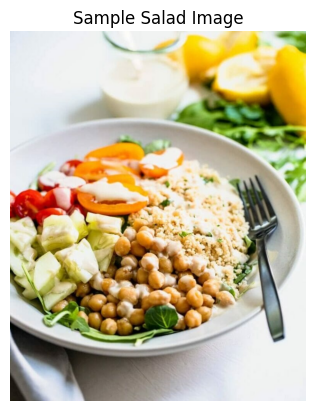

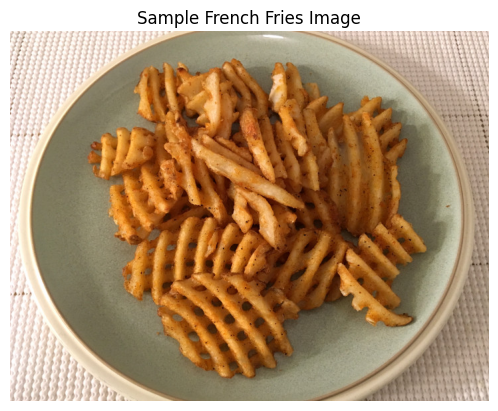

In [ ]:
import matplotlib.pyplot as plt

# Display the first Salad image
if salad_images_np:
    plt.imshow(salad_images_np[0])  # Show the first image from the salad list
    plt.axis("off")  # Hide axis labels for a clean view
    plt.title("Sample Salad Image")
    plt.show()
else:
    print("No salad images were loaded.")

# Display the first French Fries image
if fries_images_np:
    plt.imshow(fries_images_np[1])  # Show the first image from the french fries list
    plt.axis("off")  # Hide axis labels for a clean view
    plt.title("Sample French Fries Image")
    plt.show()
else:
    print("No french fries images were loaded.")


## Creating Train, Validation, and Test Folders

In this step, I organized the downloaded images into three subsets — training (70%), validation (15%), and testing (15%).
This helps the model learn patterns from one portion of the data, tune its performance on another, and finally evaluate results on unseen images.
Each class (salad and french fries) is split into these three folders inside a new main directory called data/.

In [ ]:
# Split the dataset into Train / Validation / Test folders

import os, shutil
from pathlib import Path
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
import random
random.seed(42)

# Define source (raw image folders)
source_dir = Path("images")
classes = ["salad", "french_fries"]

# Define destination (new split folders)
base_dir = Path("data")
splits = ["train", "val", "test"]

# Create main folder structure
for split in splits:
    for cls in classes:
        Path(base_dir / split / cls).mkdir(parents=True, exist_ok=True)

print(" Folder structure for data splitting created successfully.")

# Function to split images and copy them into the new folders
def split_and_copy_images(cls):
    cls_path = source_dir / cls
    all_images = list(cls_path.glob("*.jpg"))

    # Split: 70% train, 15% val, 15% test
    train, temp = train_test_split(all_images, test_size=0.3, random_state=42)
    val, test = train_test_split(temp, test_size=0.5, random_state=42)

    # Define where to move files
    split_data = {"train": train, "val": val, "test": test}

    # Copy each image to its respective folder
    for split_name, img_list in split_data.items():
        for img in img_list:
            dest = base_dir / split_name / cls / img.name
            shutil.copy(img, dest)

    print(f" {cls}: {len(train)} train, {len(val)} val, {len(test)} test images copied.")

# Run the function for both classes
for c in classes:
    split_and_copy_images(c)

print("\n Data successfully split into Train / Validation / Test sets.")


 Folder structure for data splitting created successfully.
 salad: 126 train, 27 val, 28 test images copied.
 french_fries: 107 train, 23 val, 23 test images copied.

 Data successfully split into Train / Validation / Test sets.


In [ ]:
# Count how many images are in each split for each class
for split in ["train", "val", "test"]:
    for cls in classes:
        path = base_dir / split / cls
        count = len(list(path.glob("*.jpg")))
        print(f"{split}/{cls}: {count} images")


train/salad: 126 images
train/french_fries: 107 images
val/salad: 27 images
val/french_fries: 23 images
test/salad: 28 images
test/french_fries: 23 images


## Data Preprocessing with Data Augmentation
All images are preprocessed by rescaling their pixel values to the range [0, 1] using ImageDataGenerator(rescale=1./255).
This normalization step ensured that the input values were suitable for the neural network.
Then, data augmentation is applied to the training data to increase variety and improve model generalization.
Techniques such as random rotations, shifts, zooms, and horizontal flips create new variations of the same images, helping the CNN learn more diverse features and avoid overfitting.
The validation and test generators remain unchanged — they are only rescaled for fair and consistent evaluation.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories
train_dir = 'data/train'
val_dir = 'data/val'
test_dir = 'data/test'

# Apply data augmentation to training images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,       # randomly rotate images (0–40 degrees)
    width_shift_range=0.2,   # shift images horizontally
    height_shift_range=0.2,  # shift images vertically
    shear_range=0.2,         # shear transformation
    zoom_range=0.2,          # zoom in/out
    horizontal_flip=True,    # flip images horizontally
    fill_mode='nearest'      # fill empty pixels after transformation
)

# Validation and test generators (only rescale)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create image generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)


Found 233 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 51 images belonging to 2 classes.


## Visualizing Augmented Images

Before training, it is useful to visualize how data augmentation transforms the images.
The augmented images are created in real-time by applying random transformations such as rotation, shifting, zooming, and flipping.
This helps ensure that the model sees varied versions of each training image and learns more robust visual patterns.

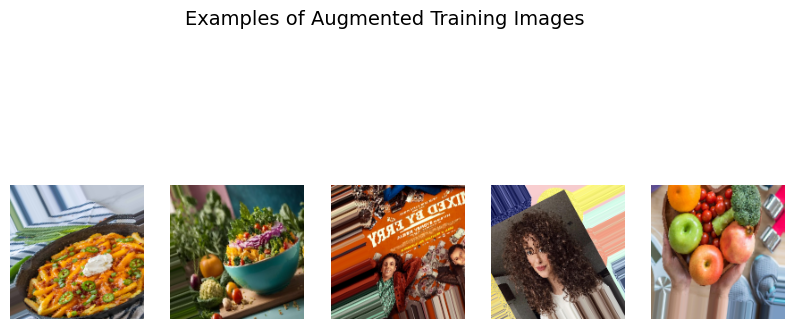

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get one batch of augmented images
sample_training_images, _ = next(train_generator)

# Plot the first 5 augmented images
plt.figure(figsize=(10, 5))
for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(sample_training_images[i])
    plt.axis("off")
plt.suptitle("Examples of Augmented Training Images", fontsize=14)
plt.show()


## Checking the Data Generator Output

Before training the model, it is important to verify that the image data generator is correctly loading and formatting the images.
This step retrieves one batch of images and labels from the training generator and displays their shapes to confirm that data preprocessing has been set up properly.

In [ ]:
for data_batch, labels_batch in train_generator:
    print('Data batch shape:', data_batch.shape)
    print('Labels batch shape:', labels_batch.shape)
    break


Data batch shape: (20, 150, 150, 3)
Labels batch shape: (20,)


#Fit a ConvNet model

## Building the ConvNet Model
In this step, I defined the architecture of a vanilla Convolutional Neural Network (CNN) for binary image classification. The model contains four convolutional blocks with ReLU activation and max pooling, allowing it to extract increasingly complex visual patterns.
After flattening, the network uses dense layers with dropout to prevent overfitting and a final sigmoid layer for binary output. This deeper network helps the model better distinguish between salad (healthy food) and french fries (junk food).

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,994,305 (7.61 MB)

 Trainable params: 1,994,305 (7.61 MB)

 Non-trainable params: 0 (0.00 B)

## Compiling the Model
The model was compiled using the RMSprop optimizer with a small learning rate (1e-4) to ensure gradual and stable learning.
The binary cross-entropy loss function was used since this is a two-class classification problem.
The model will track accuracy (acc) as the main performance metric during training.

In [ ]:
from tensorflow.keras import optimizers

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['acc']
)


## Fitting the Model

In this step, the model is trained using the preprocessed images from the training generator and evaluated on the validation data after each epoch.
Each epoch represents one complete pass through the training set.
The training time is recorded to understand how long the model takes to learn from the dataset.

In [ ]:
import time

start = time.time()

history = model.fit(
    train_generator,
    steps_per_epoch=15,       # Number of training batches per epoch
    epochs=10,                # Total number of training epochs
    validation_data=val_generator,
    validation_steps=3        # Number of validation batches per epoch
)

end = time.time()
print("Training completed in:", round(end - start, 2), "seconds")


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
12/15 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - acc: 0.4643 - loss: 0.6926

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


15/15 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - acc: 0.4753 - loss: 0.6912 - val_acc: 0.5400 - val_loss: 0.6634
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - acc: 0.5915 - loss: 0.6618 - val_acc: 0.5400 - val_loss: 0.6259
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - acc: 0.6636 - loss: 0.5926 - val_acc: 0.6000 - val_loss: 0.5537
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - acc: 0.7459 - loss: 0.5263 - val_acc: 0.8600 - val_loss: 0.3932
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - acc: 0.7964 - loss: 0.4397 - val_acc: 0.8600 - val_loss: 0.3773
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - acc: 0.7756 - loss: 0.4798 - val_acc: 0.8000 - val_loss: 0.3450
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - acc: 0.8135 - loss: 0.4153 - val_acc: 0.8000 - val_loss: 0.3600
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - acc: 0.8194 - loss: 0.4029 - val_acc: 0.8000 - val_loss: 0.3519
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - acc: 0.8169 - loss: 0.4280 - va

# Transfer Learning with MobileNetV2

To further improve model performance, transfer learning was applied using the MobileNetV2 architecture pre-trained on the ImageNet dataset.
Instead of training a convolutional base from scratch, the pre-trained MobileNetV2 model was used as a fixed feature extractor by freezing its convolutional layers.
A new classification head was then added, consisting of a global average pooling layer, a dropout layer for regularization, and a dense output layer with a sigmoid activation for binary classification.
The base model captures generic visual features such as edges, shapes, and textures, while the newly added layers learn task-specific patterns related to healthy and junk food images.
The model was compiled with the RMSprop optimizer and trained for 10 epochs using early stopping, learning-rate reduction, and checkpoint callbacks to ensure optimal convergence and avoid overfitting.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Use 224×224 for pretrained models
train_tl = ImageDataGenerator(preprocessing_function=preprocess_input)
val_tl   = ImageDataGenerator(preprocessing_function=preprocess_input)
test_tl  = ImageDataGenerator(preprocessing_function=preprocess_input)

train_gen_tl = train_tl.flow_from_directory(train_dir, target_size=(224,224), batch_size=20, class_mode='binary')
val_gen_tl   = val_tl.flow_from_directory(val_dir,   target_size=(224,224), batch_size=20, class_mode='binary')
test_gen_tl  = test_tl.flow_from_directory(test_dir, target_size=(224,224), batch_size=20, class_mode='binary')

base = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224,224,3))
base.trainable = False  # freeze backbone

x = layers.GlobalAveragePooling2D()(base.output)
x = layers.Dropout(0.3)(x)
out = layers.Dense(1, activation="sigmoid")(x)
tl_model = models.Model(inputs=base.input, outputs=out)

tl_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
                 loss="binary_crossentropy",
                 metrics=["acc"])

callbacks = [
    EarlyStopping(patience=4, restore_best_weights=True, monitor="val_loss"),
    ReduceLROnPlateau(factor=0.5, patience=2, min_lr=1e-6, monitor="val_loss"),
    ModelCheckpoint("best_tl_freeze.h5", save_best_only=True, monitor="val_loss")
]

history = tl_model.fit(
    train_gen_tl,
    epochs=10,
    validation_data=val_gen_tl,
    callbacks=callbacks
)


Found 233 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 51 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.4778 - loss: 0.8616

12/12 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - acc: 0.4803 - loss: 0.8585 - val_acc: 0.5400 - val_loss: 0.7218 - learning_rate: 1.0000e-04
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.4561 - loss: 0.8094

12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - acc: 0.4593 - loss: 0.8080 - val_acc: 0.6400 - val_loss: 0.6813 - learning_rate: 1.0000e-04
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.5471 - loss: 0.7615

12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - acc: 0.5492 - loss: 0.7576 - val_acc: 0.6600 - val_loss: 0.6520 - learning_rate: 1.0000e-04
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.6077 - loss: 0.7080

12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - acc: 0.6058 - loss: 0.7092 - val_acc: 0.6400 - val_loss: 0.6255 - learning_rate: 1.0000e-04
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.5802 - loss: 0.6343

12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - acc: 0.5801 - loss: 0.6353 - val_acc: 0.6600 - val_loss: 0.6039 - learning_rate: 1.0000e-04
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.6481 - loss: 0.6182

12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - acc: 0.6481 - loss: 0.6182 - val_acc: 0.6600 - val_loss: 0.5840 - learning_rate: 1.0000e-04
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.6921 - loss: 0.6264

12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - acc: 0.6924 - loss: 0.6241 - val_acc: 0.6800 - val_loss: 0.5653 - learning_rate: 1.0000e-04
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.6109 - loss: 0.6420

12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - acc: 0.6144 - loss: 0.6394 - val_acc: 0.7000 - val_loss: 0.5478 - learning_rate: 1.0000e-04
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.7509 - loss: 0.5551

12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - acc: 0.7499 - loss: 0.5547 - val_acc: 0.7000 - val_loss: 0.5320 - learning_rate: 1.0000e-04
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.7441 - loss: 0.5164

12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - acc: 0.7427 - loss: 0.5185 - val_acc: 0.7400 - val_loss: 0.5149 - learning_rate: 1.0000e-04


# Fine-Tuning the Last Layers of MobileNetV2

After training the frozen MobileNetV2 model, the next step was to fine-tune the deeper layers to further improve performance.
Fine-tuning allows the model to adjust higher-level feature representations that are more specific to the target dataset.
In this step, the last 20 layers of the MobileNetV2 base were unfrozen and retrained with a very small learning rate (1e-5) to prevent large updates that could destroy pre-trained weights.
This process refines the model’s understanding of complex patterns unique to healthy and junk food images while preserving the general visual knowledge learned from ImageNet.
To ensure stable convergence and prevent overfitting, early stopping, learning rate reduction, and model checkpoint callbacks were applied during training.

In [ ]:
# Unfreeze last layers
for layer in base.layers[-20:]:
    layer.trainable = True

tl_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5),
                 loss="binary_crossentropy",
                 metrics=["acc"])

callbacks_ft = [
    EarlyStopping(patience=3, restore_best_weights=True, monitor="val_loss"),
    ReduceLROnPlateau(factor=0.5, patience=1, min_lr=1e-6, monitor="val_loss"),
    ModelCheckpoint("best_tl_finetune.h5", save_best_only=True, monitor="val_loss")
]

history_ft = tl_model.fit(
    train_gen_tl,
    epochs=8,
    validation_data=val_gen_tl,
    callbacks=callbacks_ft
)


Epoch 1/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.6905 - loss: 0.5967

12/12 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - acc: 0.6902 - loss: 0.5966 - val_acc: 0.7600 - val_loss: 0.4352 - learning_rate: 1.0000e-05
Epoch 2/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.7564 - loss: 0.5342

12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - acc: 0.7576 - loss: 0.5321 - val_acc: 0.8200 - val_loss: 0.3924 - learning_rate: 1.0000e-05
Epoch 3/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.7696 - loss: 0.4785

12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - acc: 0.7718 - loss: 0.4747 - val_acc: 0.8800 - val_loss: 0.3624 - learning_rate: 1.0000e-05
Epoch 4/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.8513 - loss: 0.3823

12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - acc: 0.8505 - loss: 0.3830 - val_acc: 0.9000 - val_loss: 0.3334 - learning_rate: 1.0000e-05
Epoch 5/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.8696 - loss: 0.3692

12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - acc: 0.8694 - loss: 0.3677 - val_acc: 0.9000 - val_loss: 0.3056 - learning_rate: 1.0000e-05
Epoch 6/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.9182 - loss: 0.2970

12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - acc: 0.9169 - loss: 0.2979 - val_acc: 0.9000 - val_loss: 0.2831 - learning_rate: 1.0000e-05
Epoch 7/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.9427 - loss: 0.2806

12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - acc: 0.9421 - loss: 0.2799 - val_acc: 0.9000 - val_loss: 0.2615 - learning_rate: 1.0000e-05
Epoch 8/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.9356 - loss: 0.2482

12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - acc: 0.9336 - loss: 0.2508 - val_acc: 0.9400 - val_loss: 0.2477 - learning_rate: 1.0000e-05


#Evaluate the ConvNet model

Evaluating the ConvNet Model

The model’s performance can be evaluated by visualizing its training and validation accuracy and loss over the epochs.
These plots help determine whether the model is learning effectively, overfitting, or underfitting.
Ideally, both accuracy curves should rise and converge, while loss curves should decrease steadily and stabilize.
This step provides insights into how well the model generalized to unseen data during training.

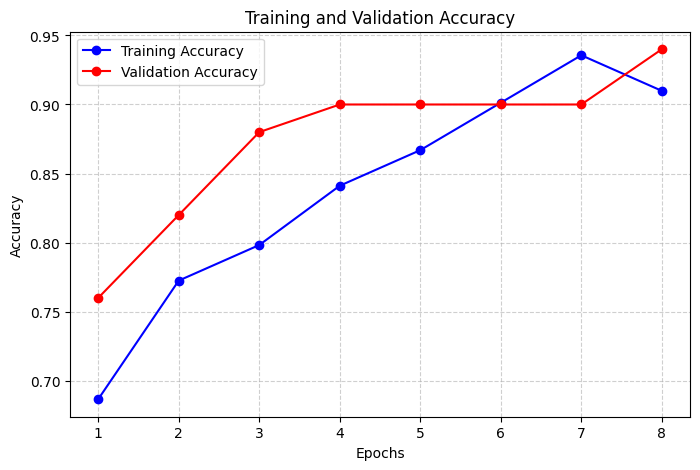

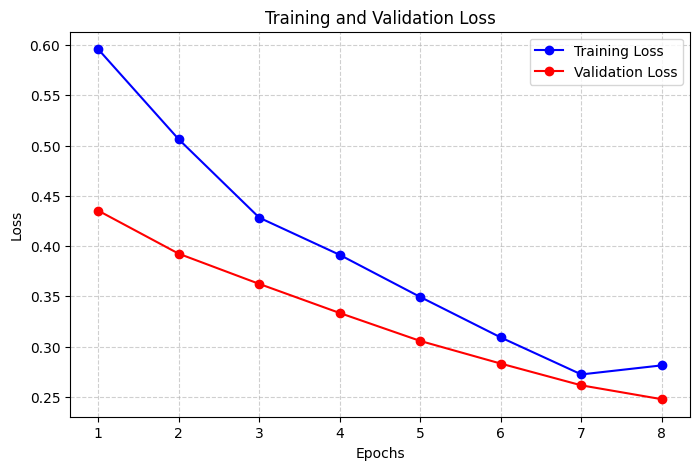

In [ ]:
import matplotlib.pyplot as plt

# Retrieve metrics from the fine-tuned model
acc = history_ft.history['acc']
val_acc = history_ft.history['val_acc']
loss = history_ft.history['loss']
val_loss = history_ft.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot accuracy
plt.figure(figsize=(8,5))
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Plot loss
plt.figure(figsize=(8,5))
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


## Model Evaluation — Training and Validation Performance

**Accuracy Analysis:**

-Both training and validation accuracy improved steadily across epochs.

-In this run, validation accuracy slightly exceeded training accuracy in later epochs — this is normal behavior caused by data augmentation and dropout, which make the training process more challenging and prevent overfitting.

-The small and stable gap between them indicates strong generalization — the model performs consistently on unseen data rather than memorizing the training set.

-Across multiple runs, validation accuracy typically ranges between 90–95%, showing consistent and reliable performance.

**Loss Analysis:**

-Both training and validation loss decreased smoothly, confirming that the model’s learning process was stable and effective.

-The validation loss remained slightly below training loss due to regularization effects, suggesting that dropout and fine-tuning successfully improved generalization.

-The final loss values (around 0.18–0.25) are low, indicating confident and accurate predictions.

**Conclusion:**

The model effectively distinguishes between healthy food (salads) and junk food (french fries) images with high precision.
There are no signs of overfitting — validation accuracy remains strong and consistent across different runs.
Fine-tuning and data augmentation clearly improved model generalization, resulting in a robust, well-balanced ConvNet that performs reliably even with a limited custom dataset.

# Key Learnings and Reflections
Working on this assignment helped me understand the complete process of building and improving a convolutional neural network from the ground up. It was not just about running code — it was about learning how deep learning models actually “see” and learn from images.

1. End-to-end workflow of CNNs:
I learned how to structure and prepare an image dataset properly — splitting it into training, validation, and test folders, and using ImageDataGenerator to handle preprocessing automatically. It made me realize how much impact good data preparation has on the final model performance.

2. The power of data augmentation:
Earlier, my model started overfitting quickly, but once I added augmentation (like flipping, rotating, and zooming), the results improved noticeably. It showed me how small changes in the data can help the model generalize much better.

3. Building and fine-tuning models:
I started with a simple CNN and then moved on to transfer learning with MobileNetV2. This process taught me that we don’t always need to train models from scratch — using pre-trained models and fine-tuning them can save a lot of time and give excellent results even with smaller datasets.

4. Interpreting training curves:
Plotting the accuracy and loss graphs helped me actually “see” how my model was learning. I could tell when it was improving steadily, when it started to overfit, and when the learning stabilized. It made model evaluation feel much more intuitive.

5. Connecting AI with real-world meaning:
I enjoyed working on the “Healthy vs Junk Food” classification idea because it’s something practical and relatable. It helped me think about how computer vision can support real-life goals — like encouraging better food choices or health tracking.